# 60.単語ベクトルの読み込みと表示

In [2]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary = True)

In [3]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [4]:
model['3-BlackBerry']

KeyError: "Key '3-BlackBerry' not present"

# 61.単語の類似度

In [25]:
model.similarity('United_States', 'U.S')

0.3638412

# 62.類似度の高い単語10件

In [26]:
model.most_similar('United_States',topn = 10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

# 63.加法構成性によるアナロジー

In [28]:
 model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'],topn = 10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

# 64.アナロジーデータでの実験

In [63]:
with open('questions-words.txt') as f,open('res.txt','w') as q:
    for lines in f.readlines():       
        if lines[0] == ':':
            q.write(lines)
        else:
            line = lines.replace('\n','').split()
            name, valid = model.most_similar(positive = line[1:3],negative=line[0:1],topn=1)[0]
            q.write('{} {} {}\n'.format(lines.replace('\n',''),name,valid))

In [64]:
!head -n 5 res.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.635187029838562
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235778570175171
Athens Greece Berlin Germany Germany 0.6734622716903687


# 65.アナロジータスクでの正解率

In [11]:
with open('res.txt') as f:
    lines = f.read().splitlines()
    
dataset = []
category = None

for line in lines:
    if line.startswith(':'):
        category = line[2:]
    else:
        lst = [category] + line.split(' ')
        dataset.append(lst)

In [12]:
df = pd.DataFrame(dataset)
df

,0,1,2,3,4,5,6
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187029838562
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand,0.7137669324874878
2,capital-common-countries,Athens,Greece,Beijing,China,China,0.7235778570175171
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany,0.6734622716903687
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland,0.4919748306274414
...,...,...,...,...,...,...,...
19539,gram9-plural-verbs,write,writes,talk,talks,talked,0.5447186231613159
19540,gram9-plural-verbs,write,writes,think,thinks,thinks,0.6177733540534973
19541,gram9-plural-verbs,write,writes,vanish,vanishes,disappear,0.6002705693244934
19542,gram9-plural-verbs,write,writes,walk,walks,walks,0.5534339547157288


In [13]:
sem = df[~df[0].str.contains('gram')]
syn = df[df[0].str.contains('gram')]
print('意味的アナロジー:',(sem[4] == sem[5]).sum()/len(sem))
print('文法的アナロジー:',(syn[4] == syn[5]).sum()/len(syn))

意味的アナロジー: 0.7308602999210734
文法的アナロジー: 0.7400468384074942


# 66.WordSimilarity-353での評価

In [14]:
df_human = pd.read_csv('combined.csv',sep = ',')
df_human

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


In [15]:
from scipy.stats import spearmanr
model_sim = [model.similarity(word[1][0],word[1][1]) for word in df_human.iterrows()]
human_sim = df_human['Human (mean)']
print(spearmanr(human_sim,model_sim).correlation)

0.7000166486272194


# 67.k-meansクラスタリング

In [38]:
from sklearn.cluster import KMeans

countries1 = {word for words in df[df[0].str.contains('capital')][[2,4]].itertuples() for word in [words[1],words[2]]}
countries2 = {word for words in df[df[0].str.contains('currency','gram6')][[1,3]].itertuples() for word in [words[1],words[2]]}
countries = countries1 | countries2


countries = list(countries)

cou_vec = [model[country] for country  in countries]

kmeans = KMeans(n_clusters=5)
kmeans.fit(cou_vec)

KMeans(n_clusters=5)

In [42]:
for i in range(5):
    print(f'リスト: {i}')
    print(' '.join([c for c, t in zip(countries, kmeans.labels_) if t == i]))

リスト: 0
Malaysia Vietnam Laos Cambodia Fiji Pakistan China Nepal Bhutan India Philippines Thailand Bangladesh Indonesia Japan Korea Taiwan Australia
リスト: 1
Honduras Uruguay Suriname Venezuela Peru Bahamas Samoa Brazil Tuvalu Jamaica Nicaragua Chile Guyana Ecuador Dominica Belize Argentina Cuba Mexico
リスト: 2
Slovakia Montenegro England Denmark Albania Lithuania Serbia Croatia Portugal Slovenia Sweden Ireland Russia Germany Finland Moldova Hungary Ukraine USA France Italy Belgium Switzerland Poland Macedonia Europe Austria Belarus Greece Bulgaria Greenland Latvia Liechtenstein Malta Romania Spain Norway Georgia Estonia Cyprus Canada
リスト: 3
Gambia Ghana Sudan Algeria Botswana Burundi Senegal Eritrea Mali Liberia Niger Uganda Malawi Nigeria Angola Kenya Mauritania Zambia Gabon Guinea Rwanda Madagascar Mozambique Namibia Zimbabwe
リスト: 4
Kyrgyzstan Iran Oman Qatar Libya Turkmenistan Lebanon Syria Iraq Tajikistan Azerbaijan Jordan Somalia Bahrain Armenia Egypt Kazakhstan Morocco Turkey Afghani

# 68.Ward法によるクラスタリング

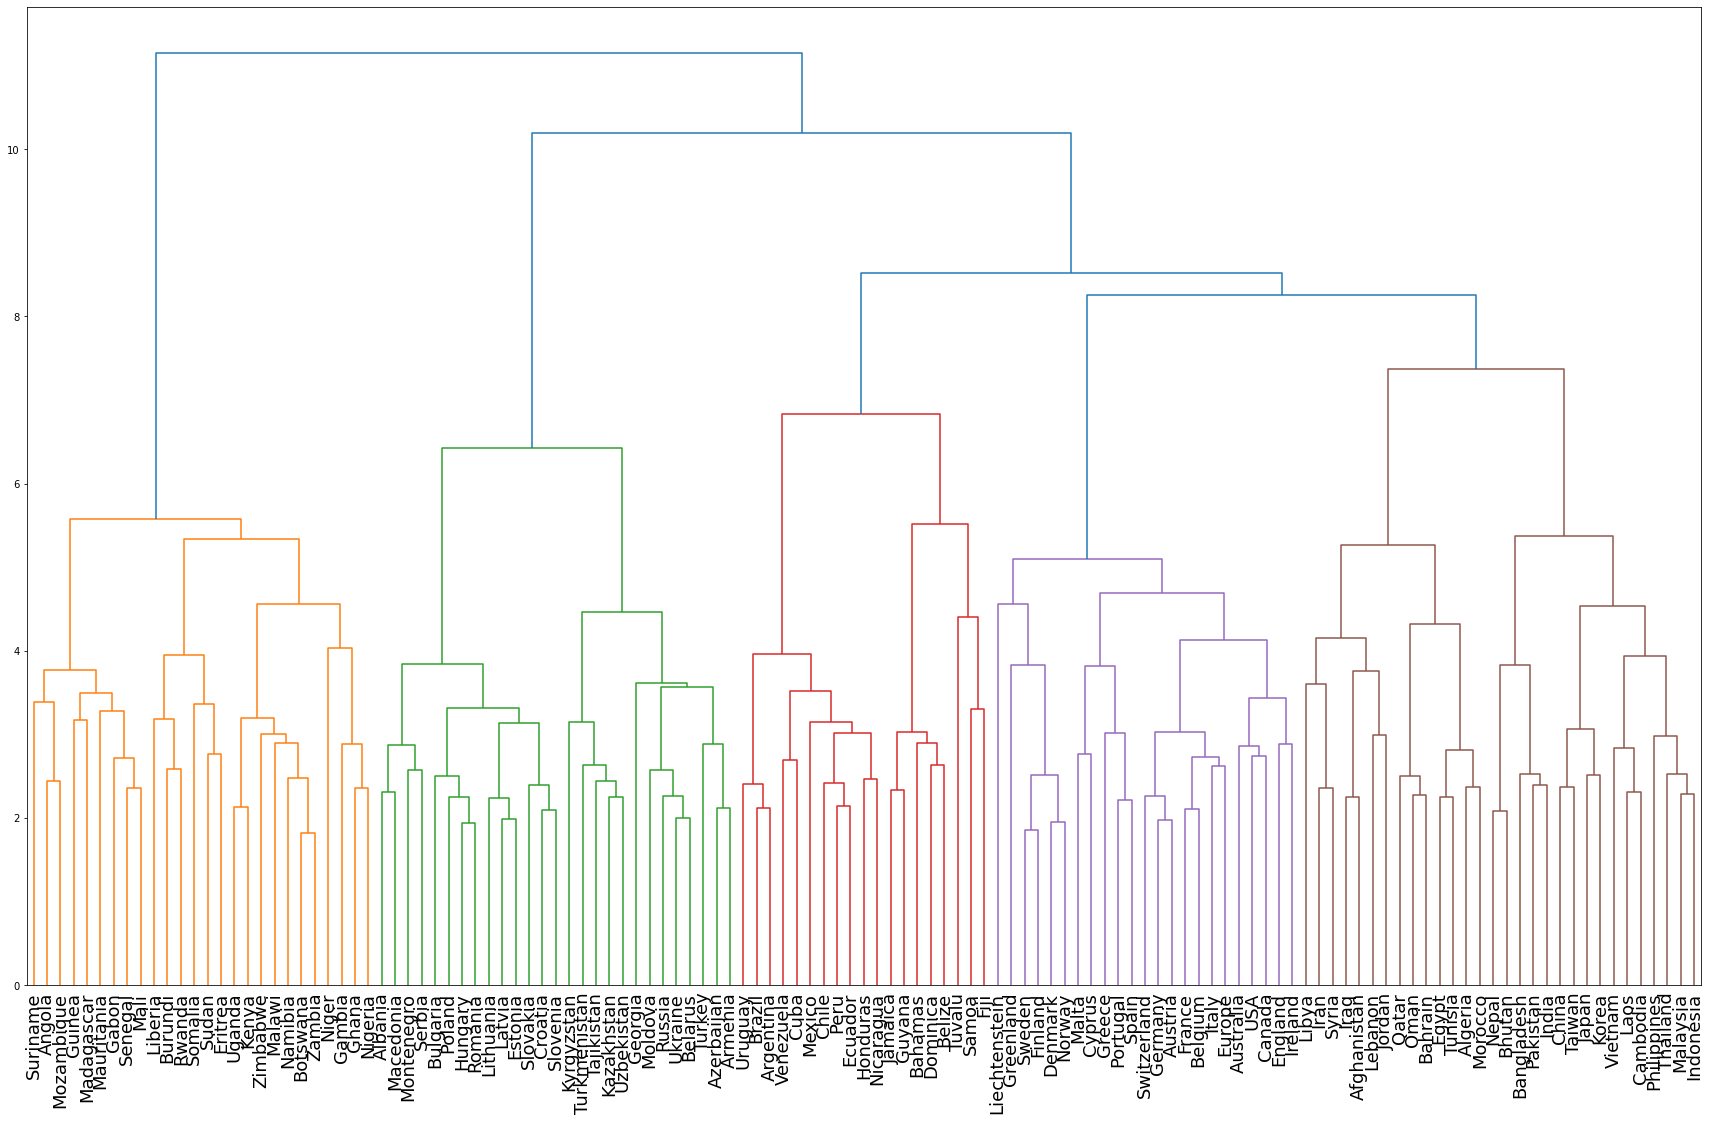

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize= (30,18))
x = linkage(cou_vec,method = 'ward')
dendrogram(x,labels = countries,leaf_font_size=18)
plt.show()

# 69.t-SNEによる可視化

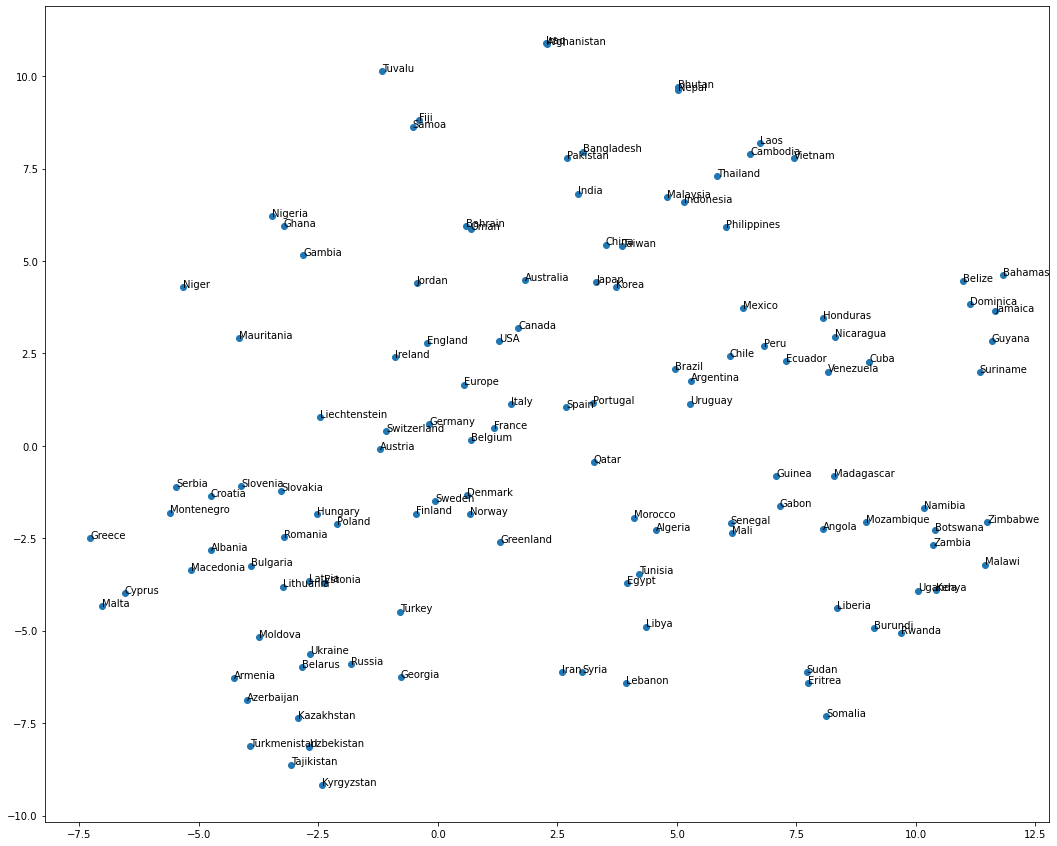

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE()
res = tsne.fit(cou_vec)

plt.figure(figsize= (18,15))
plt.scatter(res.embedding_[:,0],res.embedding_[:,1])
for (x,y), name in zip(res.embedding_,countries):
    plt.annotate(name,(x,y))
plt.show()    